<a href="https://colab.research.google.com/github/yashsantani/flower_classification/blob/master/transfer_learning_flowersdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6125332325_b768e08bd9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1801614110_bb9fa46830.jpg'),
 PosixPath('datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12450781274_eb78723921.jpg'),
 PosixPath('datasets/flower_photos/roses/15859434664_67bf3ef29f.jpg')]

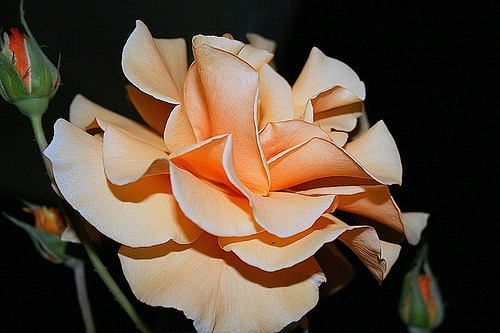

In [6]:
Image.open(str(roses[1]))

In [7]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [8]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [9]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [10]:
X = np.array(X)
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [13]:
X[0].shape

(224, 224, 3)

In [14]:
# feature_extractor_model = "https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/5"

# pretrained_model_without_top_layer = hub.KerasLayer(
#     feature_extractor_model, input_shape=(224, 224, 3), trainable=False)
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/5",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(5, activation='softmax')
])
model.build([None,224, 224, 3])  # Batch input shape.

In [15]:
# num_of_flowers = 5

# model = tf.keras.Sequential([
#   pretrained_model_without_top_layer,
#   tf.keras.layers.Dense(num_of_flowers)
# ])

# model.summary()

In [16]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 87s 982ms/step - loss: 0.8463 - acc: 0.6820
Epoch 2/5
86/86 [==============================] - 85s 987ms/step - loss: 0.3849 - acc: 0.8681
Epoch 3/5
86/86 [==============================] - 84s 982ms/step - loss: 0.3032 - acc: 0.8932
Epoch 4/5
86/86 [==============================] - 85s 985ms/step - loss: 0.2481 - acc: 0.9175
Epoch 5/5
86/86 [==============================] - 85s 985ms/step - loss: 0.2109 - acc: 0.9353


In [17]:
model.evaluate(X_test_scaled,y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


29/29 [==============================] - 29s 984ms/step - loss: 0.2969 - acc: 0.9020


[0.29691359400749207, 0.9019607901573181]